In [1]:
import sys
sys.path.append('../')

**Import Module**

In [2]:
import torch.nn as nn
from torchvision import models

from models.trainer import Trainer
from datasets.data_manager import DataManager
from models.transform_manager import TransformManager
from models.model_manager import ModelManager
from models.training_manager import TrainingManager
from models.test_manager import TestManager

from results.metrics_visualizer import MetricsVisualizer
from results.metrics_calculator import MetricsCalculator
from results.plot_visualizer import PlotVisualizer
from results.heatmap_generator import HeatmapGenerator

**Define Model Class**

In [11]:
class EfficeintNetB0LSTM(nn.Module):
    def __init__(self, num_classes, hidden_size=1024, num_layers=1):
        super(EfficeintNetB0LSTM, self).__init__()
        # Load the pretrained EfficeintNetB0 model
        self.model = models.efficientnet_b0(pretrained=True)
        

        num_ftrs = self.model.classifier[1].in_features
        
        self.model.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(num_ftrs, num_classes)
        )
        
        # LSTM layer
        self.lstm = nn.LSTM(input_size=num_classes, hidden_size=hidden_size, 
                            num_layers=num_layers, batch_first=True)
        
        # Final fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        
        x = x.unsqueeze(1)
        # x shape: (batch_size, sequence_length, C, H, W)
        batch_size, sequence_length, C, H, W = x.size()
        
        # Flatten the sequence to apply EfficientNetB0 to each image
        x = x.view(batch_size * sequence_length, C, H, W)
        
        # Feature extraction with EfficientNetB0
        features = self.model(x)
        
        # Reshape to get the sequence back
        features = features.view(batch_size, sequence_length, -1)
        
        # LSTM for sequence processing
        lstm_out, _ = self.lstm(features)
        
        # Only take the output from the final time-step
        lstm_out = lstm_out[:, -1, :]
        
        # Final classification layer
        out = self.fc(lstm_out)
        return out

**Define Model Name & Initialize Model Class**

In [12]:
modelName = "EfficientNetB0LSTM"
MODEL = EfficeintNetB0LSTM

**Constants**

In [13]:
BATCH_SIZE = 64
LEARNING_RATE = 1e-4
SIZE = 224
FOLD_SPLITS=2
EPOCHS = 30
DEVICE = "cuda"
WEIGHT_DECAY = 1e-4
OPTIMIZER_TYPE = "Adam"

MAIN_CSV_FILE = "../final_label.csv"
LABEL_COLS = ["Fracture", "CalvarialFracture", "OtherFracture"]
DATASET_PATH = "../Dataset_PNG"
TEST_CSV_FILE = "../test_fold.csv"

MODEL_SAVE_PATH = f"./models/{modelName}"
TRAINING_VALIDATION_PLOT_SAVE_PATH = f"./results/{modelName}"
PLOT_SAVE_PATH = f"./results/{modelName}"
GRADCAM_HEATMAP_SAVE_PATH = f"./results/{modelName}"
CAM_OUTPUT_SIZE = 512

***Initialize necessary modules***

In [14]:
data_manager = DataManager(MAIN_CSV_FILE, LABEL_COLS, FOLD_SPLITS)

transform_manager = TransformManager(DATASET_PATH, SIZE, BATCH_SIZE)

model_manager = ModelManager(LABEL_COLS, DEVICE, MODEL_SAVE_PATH, MODEL, LEARNING_RATE, WEIGHT_DECAY, OPTIMIZER_TYPE)

training_manager = TrainingManager(data_manager, transform_manager, model_manager, EPOCHS)

***Begin training***

In [15]:
training_manager.run_training()

Processing Folds:   0%|          | 0/2 [00:00<?, ?it/s]

Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 1/30 - Train Loss: 49.6116, Train Accuracy: 0.7041, Val Loss: 29.4777, Val Accuracy: 0.8797


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 2/30 - Train Loss: 22.4212, Train Accuracy: 0.8794, Val Loss: 15.7562, Val Accuracy: 0.8990


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 3/30 - Train Loss: 14.1332, Train Accuracy: 0.9157, Val Loss: 9.8208, Val Accuracy: 0.9523


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 4/30 - Train Loss: 10.1478, Train Accuracy: 0.9480, Val Loss: 7.8771, Val Accuracy: 0.9728


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 5/30 - Train Loss: 7.4182, Train Accuracy: 0.9662, Val Loss: 5.0693, Val Accuracy: 0.9800


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 6/30 - Train Loss: 5.6747, Train Accuracy: 0.9753, Val Loss: 3.5246, Val Accuracy: 0.9835


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 7/30 - Train Loss: 4.8147, Train Accuracy: 0.9766, Val Loss: 3.6299, Val Accuracy: 0.9813


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 8/30 - Train Loss: 3.1380, Train Accuracy: 0.9821, Val Loss: 2.5631, Val Accuracy: 0.9854


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 9/30 - Train Loss: 3.4044, Train Accuracy: 0.9798, Val Loss: 2.1254, Val Accuracy: 0.9865


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 10/30 - Train Loss: 2.5835, Train Accuracy: 0.9846, Val Loss: 2.2951, Val Accuracy: 0.9905


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 11/30 - Train Loss: 2.1468, Train Accuracy: 0.9900, Val Loss: 1.7978, Val Accuracy: 0.9957


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 12/30 - Train Loss: 1.5868, Train Accuracy: 0.9958, Val Loss: 1.5437, Val Accuracy: 0.9961


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 13/30 - Train Loss: 1.8312, Train Accuracy: 0.9947, Val Loss: 1.5168, Val Accuracy: 0.9963


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 14/30 - Train Loss: 1.8043, Train Accuracy: 0.9943, Val Loss: 1.2694, Val Accuracy: 0.9957


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 15/30 - Train Loss: 0.9106, Train Accuracy: 0.9980, Val Loss: 1.5170, Val Accuracy: 0.9958


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 16/30 - Train Loss: 1.0298, Train Accuracy: 0.9969, Val Loss: 0.8747, Val Accuracy: 0.9967


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 17/30 - Train Loss: 0.9738, Train Accuracy: 0.9969, Val Loss: 1.0913, Val Accuracy: 0.9970


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 18/30 - Train Loss: 0.7100, Train Accuracy: 0.9981, Val Loss: 1.0796, Val Accuracy: 0.9973


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 19/30 - Train Loss: 0.6829, Train Accuracy: 0.9980, Val Loss: 1.0116, Val Accuracy: 0.9968


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 20/30 - Train Loss: 1.1889, Train Accuracy: 0.9957, Val Loss: 1.0913, Val Accuracy: 0.9955


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 21/30 - Train Loss: 0.4433, Train Accuracy: 0.9990, Val Loss: 0.9842, Val Accuracy: 0.9971


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 22/30 - Train Loss: 0.5200, Train Accuracy: 0.9984, Val Loss: 1.2662, Val Accuracy: 0.9966


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 23/30 - Train Loss: 0.3751, Train Accuracy: 0.9988, Val Loss: 1.0896, Val Accuracy: 0.9965


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 24/30 - Train Loss: 0.5145, Train Accuracy: 0.9982, Val Loss: 0.9060, Val Accuracy: 0.9963


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 25/30 - Train Loss: 0.5274, Train Accuracy: 0.9983, Val Loss: 0.9379, Val Accuracy: 0.9967


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 26/30 - Train Loss: 0.4506, Train Accuracy: 0.9987, Val Loss: 1.2040, Val Accuracy: 0.9967


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 27/30 - Train Loss: 0.3883, Train Accuracy: 0.9987, Val Loss: 1.0246, Val Accuracy: 0.9975


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 28/30 - Train Loss: 0.4085, Train Accuracy: 0.9988, Val Loss: 1.0482, Val Accuracy: 0.9973


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 29/30 - Train Loss: 0.3019, Train Accuracy: 0.9989, Val Loss: 1.0930, Val Accuracy: 0.9973


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 30/30 - Train Loss: 0.7534, Train Accuracy: 0.9972, Val Loss: 0.6490, Val Accuracy: 0.9977


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 1/30 - Train Loss: 49.3731, Train Accuracy: 0.7048, Val Loss: 29.2772, Val Accuracy: 0.8738


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 2/30 - Train Loss: 21.0061, Train Accuracy: 0.8840, Val Loss: 13.8048, Val Accuracy: 0.9165


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 3/30 - Train Loss: 13.5709, Train Accuracy: 0.9240, Val Loss: 11.1953, Val Accuracy: 0.9512


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 4/30 - Train Loss: 10.6302, Train Accuracy: 0.9448, Val Loss: 8.2187, Val Accuracy: 0.9670


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 5/30 - Train Loss: 8.2819, Train Accuracy: 0.9640, Val Loss: 5.9573, Val Accuracy: 0.9764


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 6/30 - Train Loss: 6.3313, Train Accuracy: 0.9733, Val Loss: 5.6254, Val Accuracy: 0.9740


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 7/30 - Train Loss: 5.2270, Train Accuracy: 0.9765, Val Loss: 4.7336, Val Accuracy: 0.9775


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 8/30 - Train Loss: 4.6250, Train Accuracy: 0.9769, Val Loss: 4.4118, Val Accuracy: 0.9793


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 9/30 - Train Loss: 3.6238, Train Accuracy: 0.9818, Val Loss: 3.1276, Val Accuracy: 0.9828


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 10/30 - Train Loss: 3.5658, Train Accuracy: 0.9812, Val Loss: 2.6951, Val Accuracy: 0.9850


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 11/30 - Train Loss: 2.7684, Train Accuracy: 0.9856, Val Loss: 2.7675, Val Accuracy: 0.9879


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 12/30 - Train Loss: 2.4493, Train Accuracy: 0.9889, Val Loss: 1.7147, Val Accuracy: 0.9948


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 13/30 - Train Loss: 1.6981, Train Accuracy: 0.9940, Val Loss: 1.5697, Val Accuracy: 0.9955


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 14/30 - Train Loss: 2.8795, Train Accuracy: 0.9889, Val Loss: 1.4107, Val Accuracy: 0.9949


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 15/30 - Train Loss: 2.1160, Train Accuracy: 0.9947, Val Loss: 1.1149, Val Accuracy: 0.9951


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 16/30 - Train Loss: 1.4990, Train Accuracy: 0.9946, Val Loss: 0.9233, Val Accuracy: 0.9963


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 17/30 - Train Loss: 0.8367, Train Accuracy: 0.9974, Val Loss: 0.8908, Val Accuracy: 0.9963


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 18/30 - Train Loss: 0.5615, Train Accuracy: 0.9984, Val Loss: 0.7299, Val Accuracy: 0.9973


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 19/30 - Train Loss: 0.9177, Train Accuracy: 0.9956, Val Loss: 0.8468, Val Accuracy: 0.9973


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 20/30 - Train Loss: 1.6850, Train Accuracy: 0.9947, Val Loss: 1.0207, Val Accuracy: 0.9960


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 21/30 - Train Loss: 1.2298, Train Accuracy: 0.9947, Val Loss: 0.6469, Val Accuracy: 0.9975


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 22/30 - Train Loss: 0.4451, Train Accuracy: 0.9983, Val Loss: 0.5209, Val Accuracy: 0.9975


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 23/30 - Train Loss: 0.4009, Train Accuracy: 0.9985, Val Loss: 0.5967, Val Accuracy: 0.9977


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 24/30 - Train Loss: 0.7456, Train Accuracy: 0.9972, Val Loss: 0.8528, Val Accuracy: 0.9965


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 25/30 - Train Loss: 0.6879, Train Accuracy: 0.9974, Val Loss: 0.5622, Val Accuracy: 0.9979


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 26/30 - Train Loss: 0.3824, Train Accuracy: 0.9987, Val Loss: 0.7646, Val Accuracy: 0.9965


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 27/30 - Train Loss: 0.6560, Train Accuracy: 0.9972, Val Loss: 0.5324, Val Accuracy: 0.9975


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 28/30 - Train Loss: 0.3080, Train Accuracy: 0.9989, Val Loss: 0.5627, Val Accuracy: 0.9975


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 29/30 - Train Loss: 0.4171, Train Accuracy: 0.9981, Val Loss: 0.3863, Val Accuracy: 0.9989


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 30/30 - Train Loss: 0.2089, Train Accuracy: 0.9996, Val Loss: 0.5554, Val Accuracy: 0.9979


***Show Training vs Validation Plot***

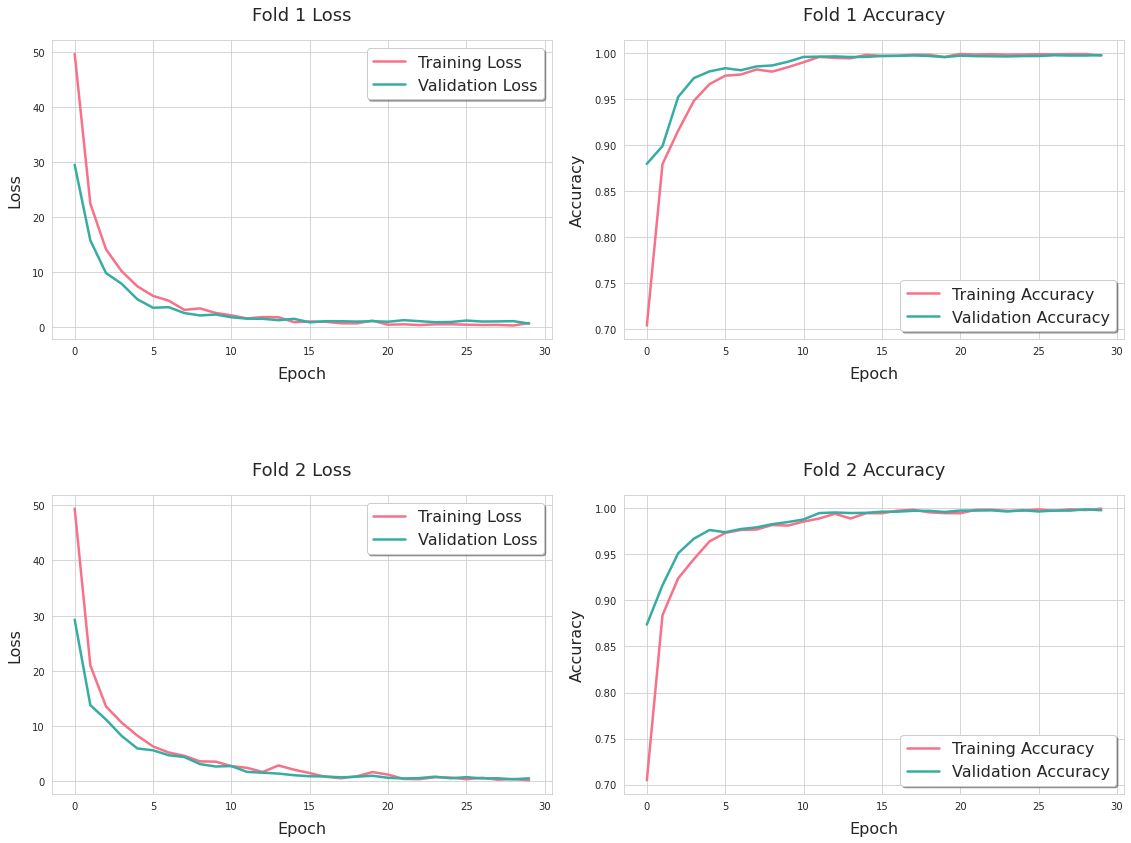

In [16]:
visualizer = MetricsVisualizer(training_manager.train_losses, training_manager.val_losses, training_manager.train_accuracies, training_manager.val_accuracies, TRAINING_VALIDATION_PLOT_SAVE_PATH)
visualizer.plot_metrics()


In [17]:
# # Sample reload example


# import results.metrics_visualizer
# import importlib
# importlib.reload(results.metrics_visualizer)
# from results.metrics_visualizer import MetricsVisualizer
# visualizer = MetricsVisualizer(training_manager.train_losses, training_manager.val_losses, training_manager.train_accuracies, training_manager.val_accuracies, TRAINING_VALIDATION_PLOT_SAVE_PATH)
# visualizer.plot_metrics()


***Begin Inference***

In [18]:
model_predictor = TestManager(DATASET_PATH, TEST_CSV_FILE, LABEL_COLS, SIZE, MODEL, DEVICE, MODEL_SAVE_PATH, FOLD_SPLITS)

predictions, true_labels, probabilities = model_predictor.make_predictions()

Processing Folds:   0%|          | 0/2 [00:00<?, ?it/s]

Processing Prediction:   0%|          | 0/2468 [00:00<?, ?it/s]

Processing Prediction:   0%|          | 0/2468 [00:00<?, ?it/s]

***Compute and Display Metrics***

In [19]:
metrics_calculator = MetricsCalculator(LABEL_COLS)

aggregated_metrics, metrics_per_class, classification_reports, multi_label_report = metrics_calculator.compute_metrics(predictions[0], true_labels[0])
metrics_calculator.display_metrics(aggregated_metrics, metrics_per_class, classification_reports, multi_label_report)


Aggregated Metrics:
{'accuracy': 0.998109130199892, 'f1_score': 0.9958132848584315, 'specificity': 0.9997767358785442, 'sensitivity': 0.9920366082251159}

Class-wise Metrics:

Fracture:
{'accuracy': 0.9991896272285251, 'f1_score': 0.9990574929311969, 'specificity': 1.0, 'sensitivity': 0.9981167608286252}

CalvarialFracture:
{'accuracy': 0.9987844408427877, 'f1_score': 0.9984607491021037, 'specificity': 0.999330207635633, 'sensitivity': 0.997948717948718}

OtherFracture:
{'accuracy': 0.9963533225283631, 'f1_score': 0.9899216125419934, 'specificity': 1.0, 'sensitivity': 0.9800443458980045}

Classification Reports Per Class:

Fracture:
              precision    recall  f1-score   support

         0.0      0.999     1.000     0.999      1406
         1.0      1.000     0.998     0.999      1062

    accuracy                          0.999      2468
   macro avg      0.999     0.999     0.999      2468
weighted avg      0.999     0.999     0.999      2468


CalvarialFracture:
            

***Display Plots***

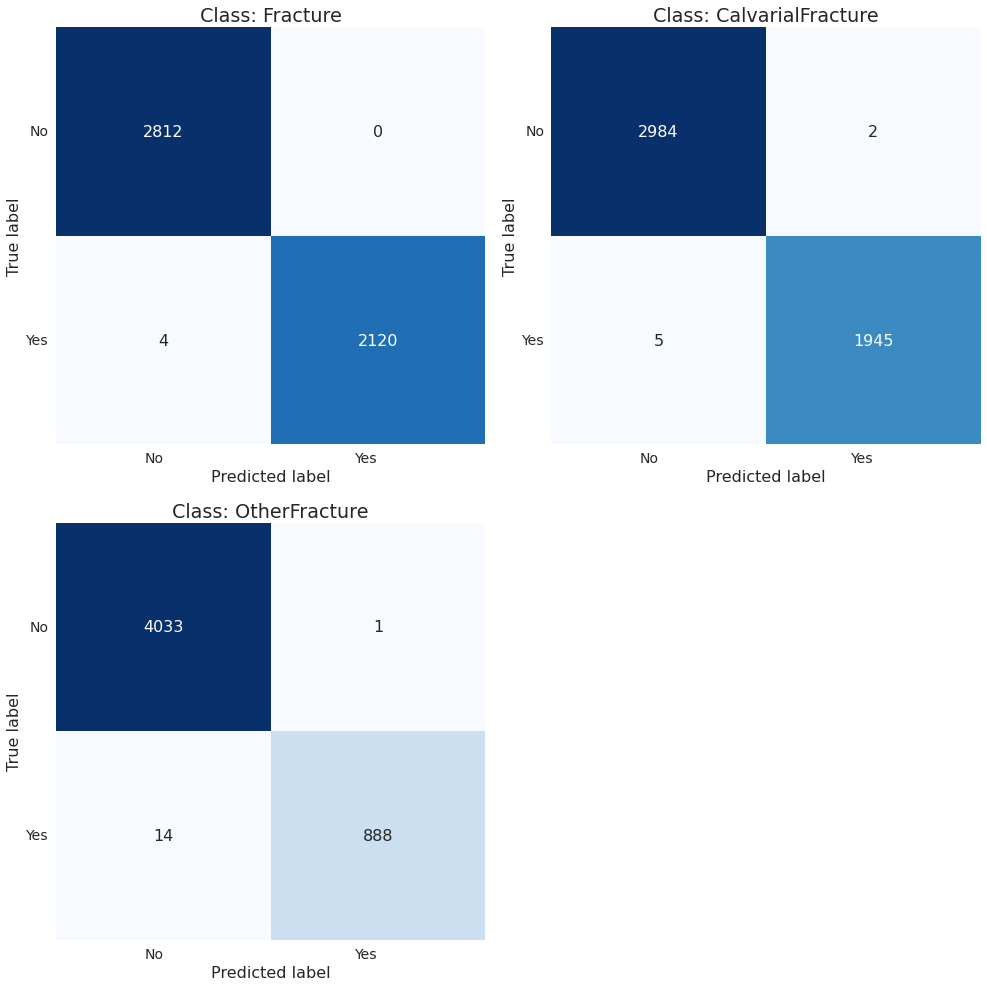

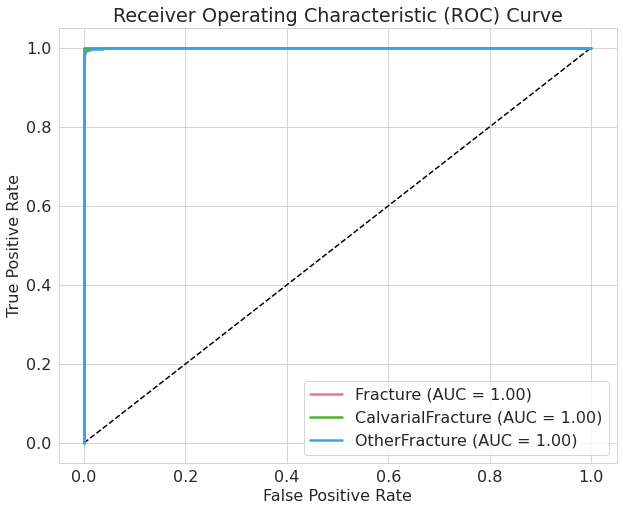

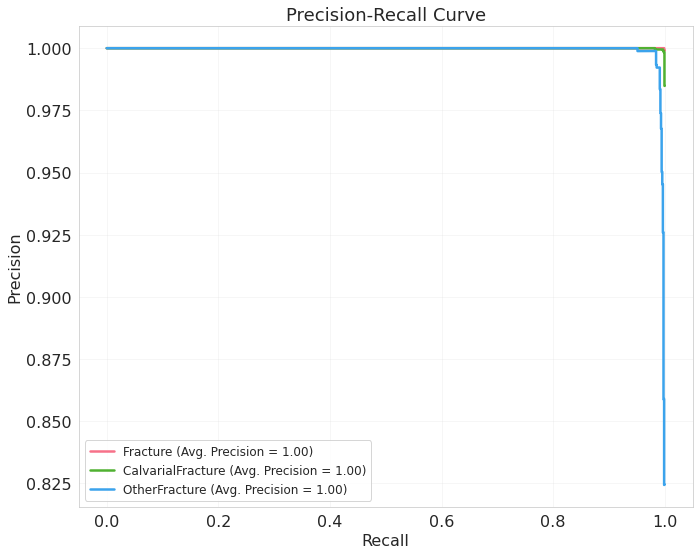

In [20]:
plot_visualizer = PlotVisualizer(LABEL_COLS, PLOT_SAVE_PATH)
plot_visualizer.plot_multilabel_confusion_matrix(true_labels, predictions)
plot_visualizer.plot_roc_curve(true_labels, probabilities)
plot_visualizer.plot_precision_recall_curve(true_labels, probabilities)

***GRADCAM HeatMap Generation***

In [28]:
# # Sample reload example


# import results.heatmap_generator
# import importlib
# importlib.reload(results.heatmap_generator)
# from results.heatmap_generator import HeatmapGenerator
# generator = HeatmapGenerator(model_predictor, TEST_CSV_FILE, MODEL, SIZE, DATASET_PATH, CAM_OUTPUT_SIZE, GRADCAM_HEATMAP_SAVE_PATH, 'EfficientNetB0')
# generator.plot_heatmaps()


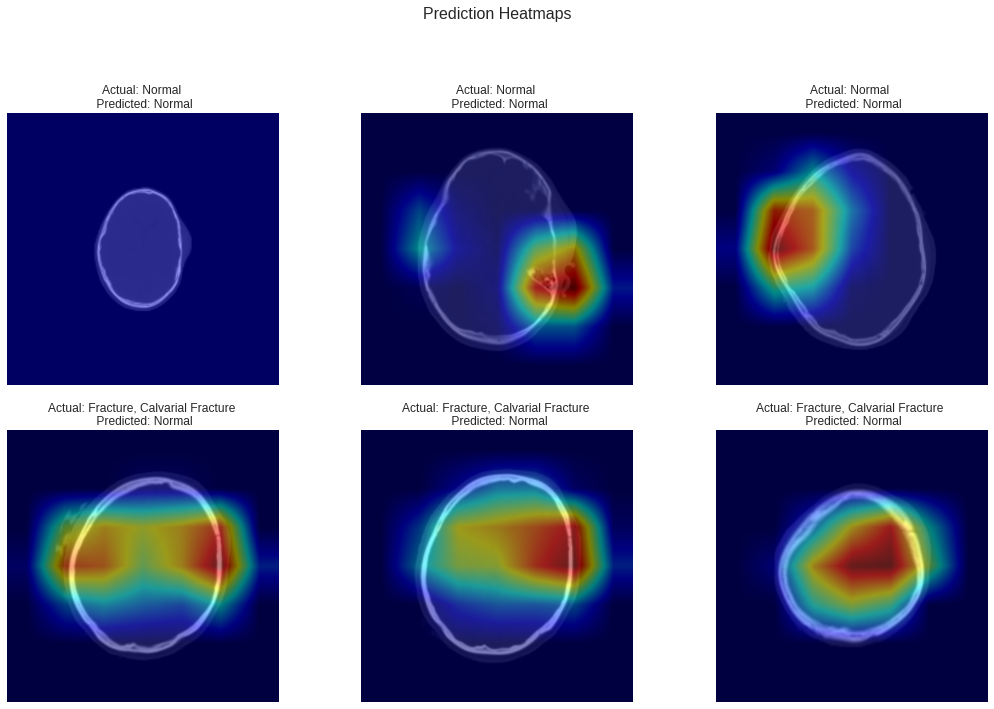

In [21]:
generator = HeatmapGenerator(model_predictor, TEST_CSV_FILE, MODEL, SIZE, DATASET_PATH, CAM_OUTPUT_SIZE, GRADCAM_HEATMAP_SAVE_PATH, 'EfficientNetB0')

generator.plot_heatmaps()